In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalnumber1: int
    finalnumber2: int

In [4]:
def adder1(state: AgentState) -> AgentState:
    """Add 2 numbers"""
    state['finalnumber1'] = state['number1'] + state['number2']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """Subtract 2 numbers"""
    state['finalnumber1'] = state['number1'] - state['number2']
    return state

def decider1(state: AgentState) -> AgentState:
    """Decide first"""
    if state['operation1'] == '+':
        return "add_operation_1"
    elif state['operation1'] == '-':
        return "sub_operation_1"
    
def adder2(state: AgentState) -> AgentState:
    """Add 2 numbers"""
    state['finalnumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtract 2 numbers"""
    state['finalnumber2'] = state['number3'] - state['number4']
    return state

def decider2(state: AgentState) -> AgentState:
    """Decide first"""
    if state['operation2'] == '+':
        return "add_operation_2"
    elif state['operation2'] == '-':
        return "sub_operation_2"

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("add_node_1",adder1)
graph.add_node("sub_node_1",subtractor1)
graph.add_node("decider1",lambda state:state)

graph.add_node("add_node_2",adder2)
graph.add_node("sub_node_2",subtractor2)
graph.add_node("decider2",lambda state: state)

graph.add_edge(START,"decider1")

graph.add_conditional_edges(
    "decider1",
    decider1,
    {
        "add_operation_1": "add_node_1",
        "sub_operation_1": "sub_node_1"
    }

)

graph.add_edge("add_node_1","decider2")
graph.add_edge("sub_node_1","decider2")

graph.add_conditional_edges(
    "decider2",
    decider2,
    {
        "add_operation_2": "add_node_2",
        "sub_operation_2": "sub_node_2"
    }

)

graph.add_edge("add_node_2",END)
graph.add_edge("sub_node_2",END)

app = graph.compile()

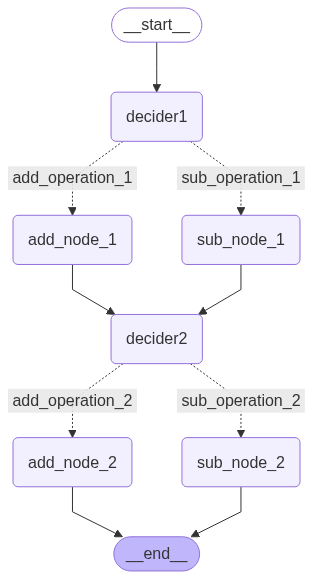

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)


In [12]:
print(app.invoke(initial_state))


KeyError: 'operation1'